<a href="https://colab.research.google.com/github/arjelmilan/CarPricePrediction/blob/main/CarPriceEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

#**Business Goal**

You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
df=pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [10]:
df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [11]:
df.shape

(205, 26)

In [12]:
#Splitting company name from car name
Companyname=df['CarName'].apply(lambda x:x.split(' ')[0])
df.insert(3,"Companyname",Companyname)

In [13]:
df.head(1)

,car_ID,symboling,CarName,Companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0


In [14]:
df.drop('CarName',axis=1)

,car_ID,symboling,Companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
df.Companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
#Fixing invalid values
df['Companyname']=df['Companyname'].str.lower()
df['Companyname']=df['Companyname'].replace({'maxda':'mazda','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})
df.Companyname.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
#checking duplicates
df.duplicated().sum()

0

In [18]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'Companyname', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

#Visualizing The Data

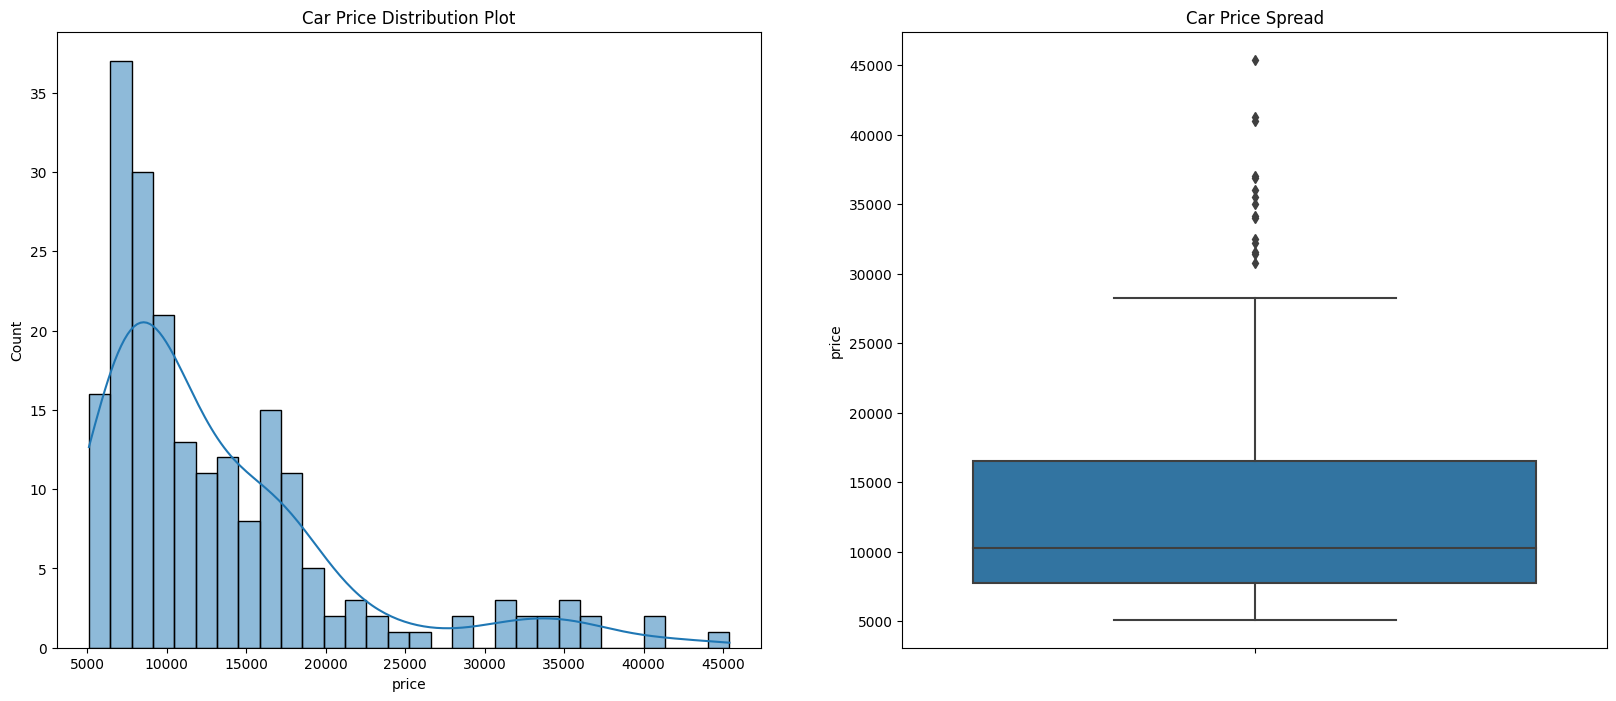

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(df.price,kde=True,bins=30)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price)

plt.show()

In [20]:
df['price'].describe(percentiles=[0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

Inference :

1.The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).

2.There is a significant difference between the mean and the median of the price distribution.

3.The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

# **#Visualizing categorical data**

<Axes: >

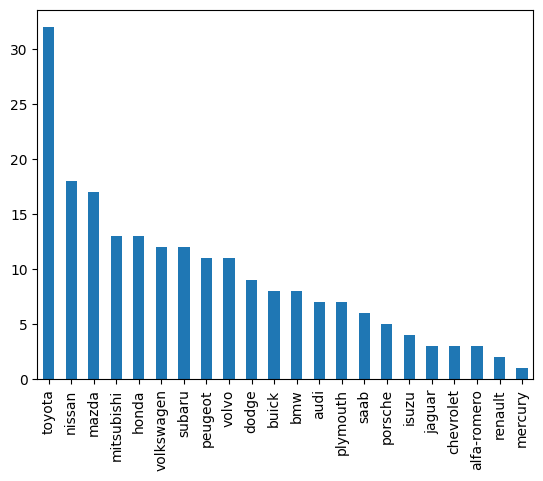

In [21]:
df['Companyname'].value_counts().plot(kind='bar')

<Axes: xlabel='Companyname', ylabel='count'>

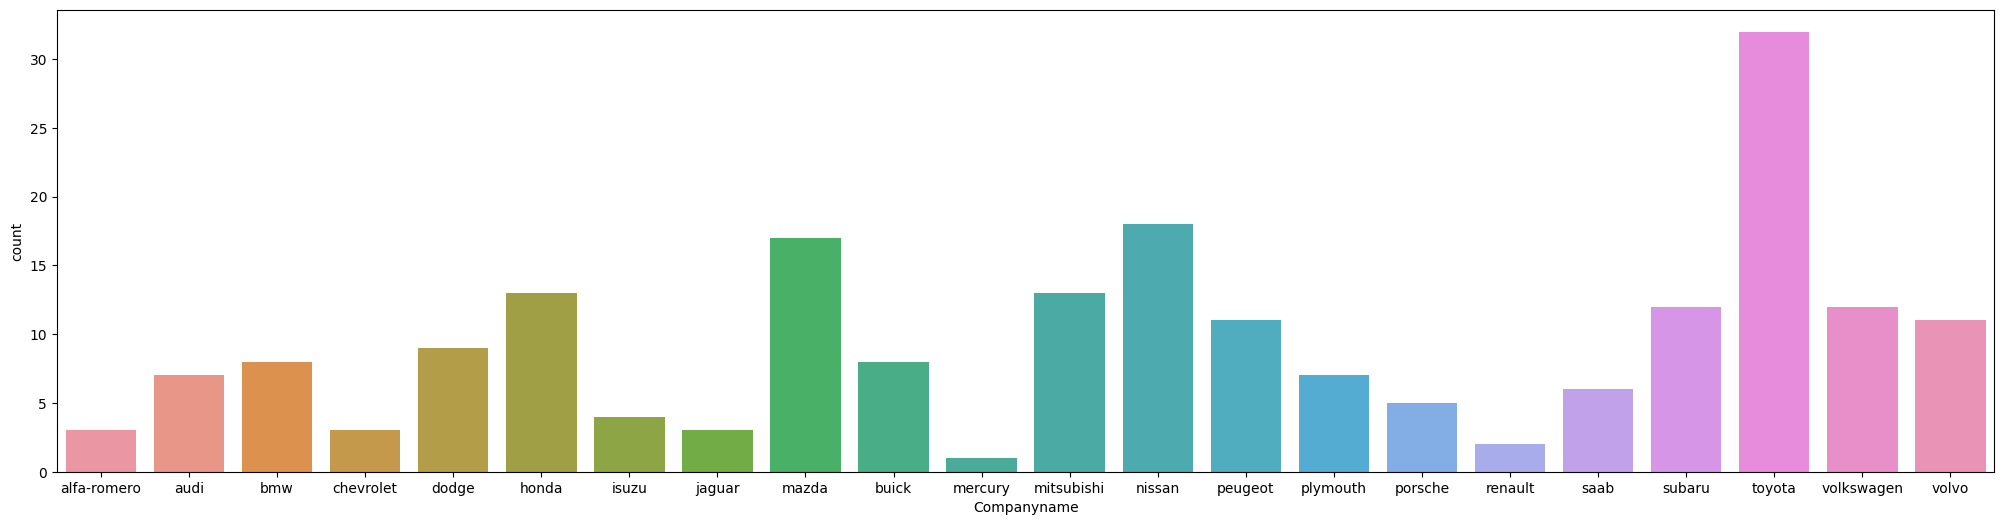

In [22]:
plt.figure(figsize=(25,6))
sns.countplot(data=df,x='Companyname')

<Axes: xlabel='fueltype', ylabel='count'>

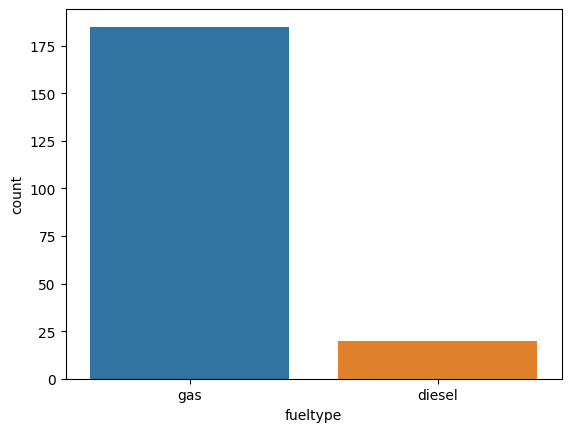

In [23]:
sns.countplot(x=df['fueltype'])

<Axes: xlabel='carbody', ylabel='count'>

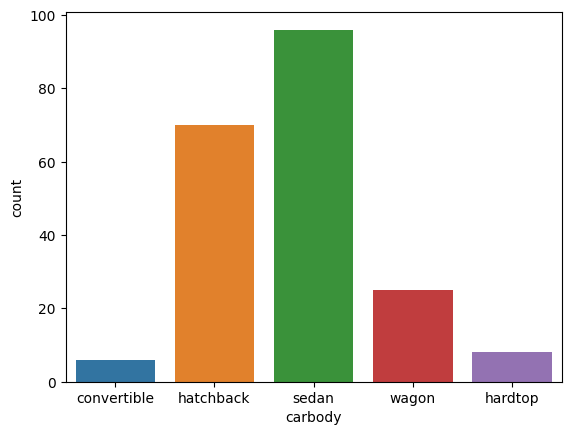

In [24]:
sns.countplot(x=df['carbody'])

Inference :

Toyota seemed to be favored car company.

Number of gas fueled cars are more than diesel.

sedan is the top car type prefered.

<Axes: xlabel='symboling', ylabel='count'>

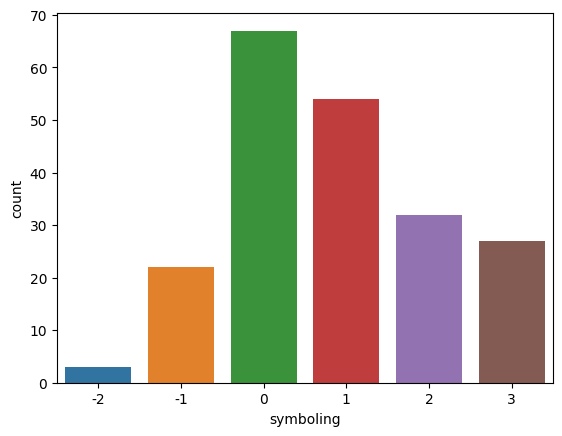

In [25]:
sns.countplot(x=df['symboling'])

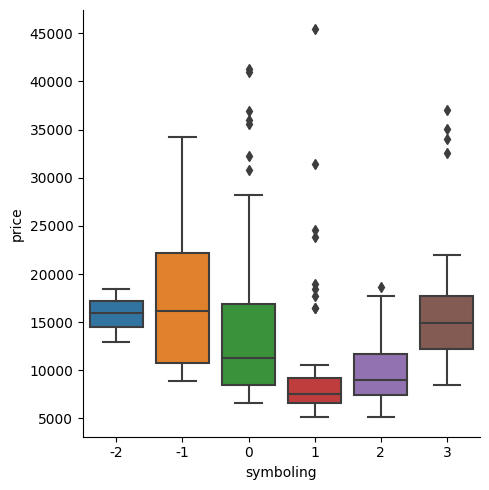

In [26]:
sns.catplot(data=df,x='symboling',y='price',kind='box')

Inference :

1.It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)

2.The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

<Axes: xlabel='enginetype', ylabel='count'>

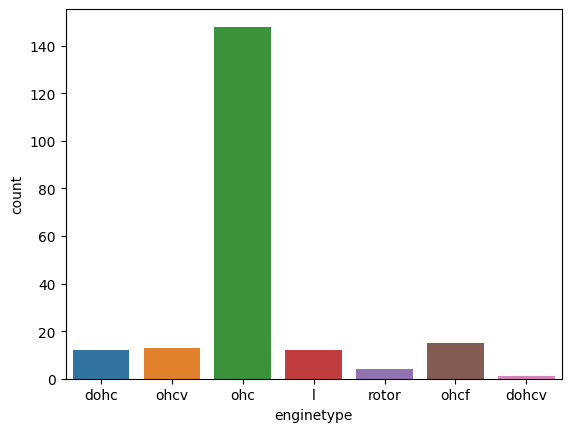

In [27]:
sns.countplot(x=df['enginetype'])

<Axes: xlabel='enginetype', ylabel='price'>

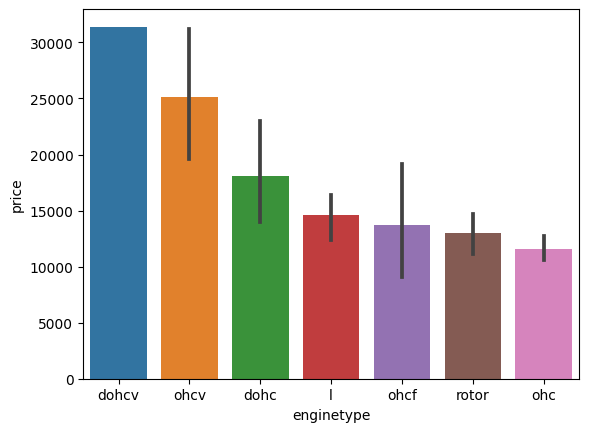

In [28]:
sns.barplot(data=df,x=df['enginetype'],y=df['price'],order=['dohcv','ohcv','dohc','l','ohcf','rotor','ohc'])

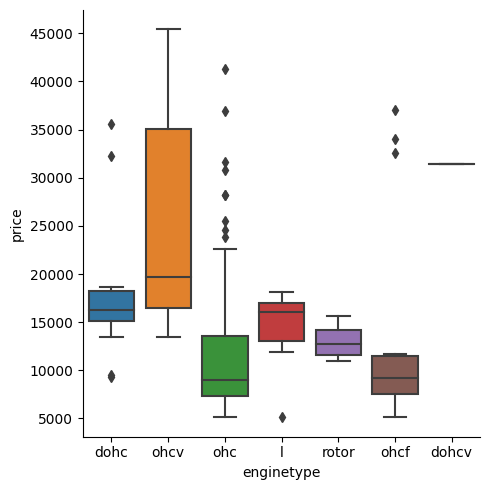

In [29]:
sns.catplot(data=df,x='enginetype',y='price',kind='box')

**Inference :**

ohc Engine type seems to be most favored type.

ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range.

<Axes: >

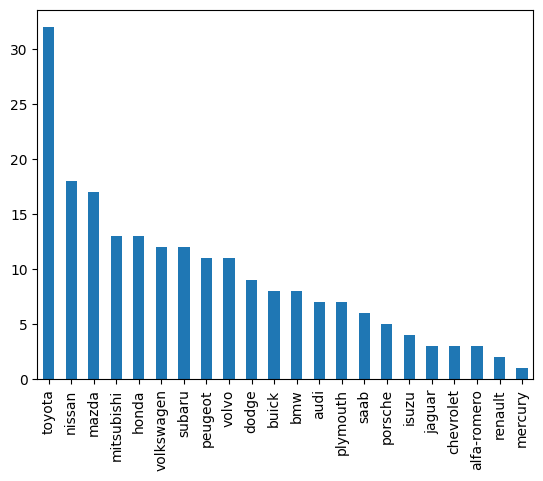

In [30]:
df['Companyname'].value_counts().plot.bar()

In [31]:
cars=df['Companyname'].value_counts().reset_index()
cars

,index,Companyname
0,toyota,32
1,nissan,18
2,mazda,17
3,mitsubishi,13
4,honda,13
5,volkswagen,12
6,subaru,12
7,peugeot,11
8,volvo,11
9,dodge,9


<Axes: xlabel='index', ylabel='Companyname'>

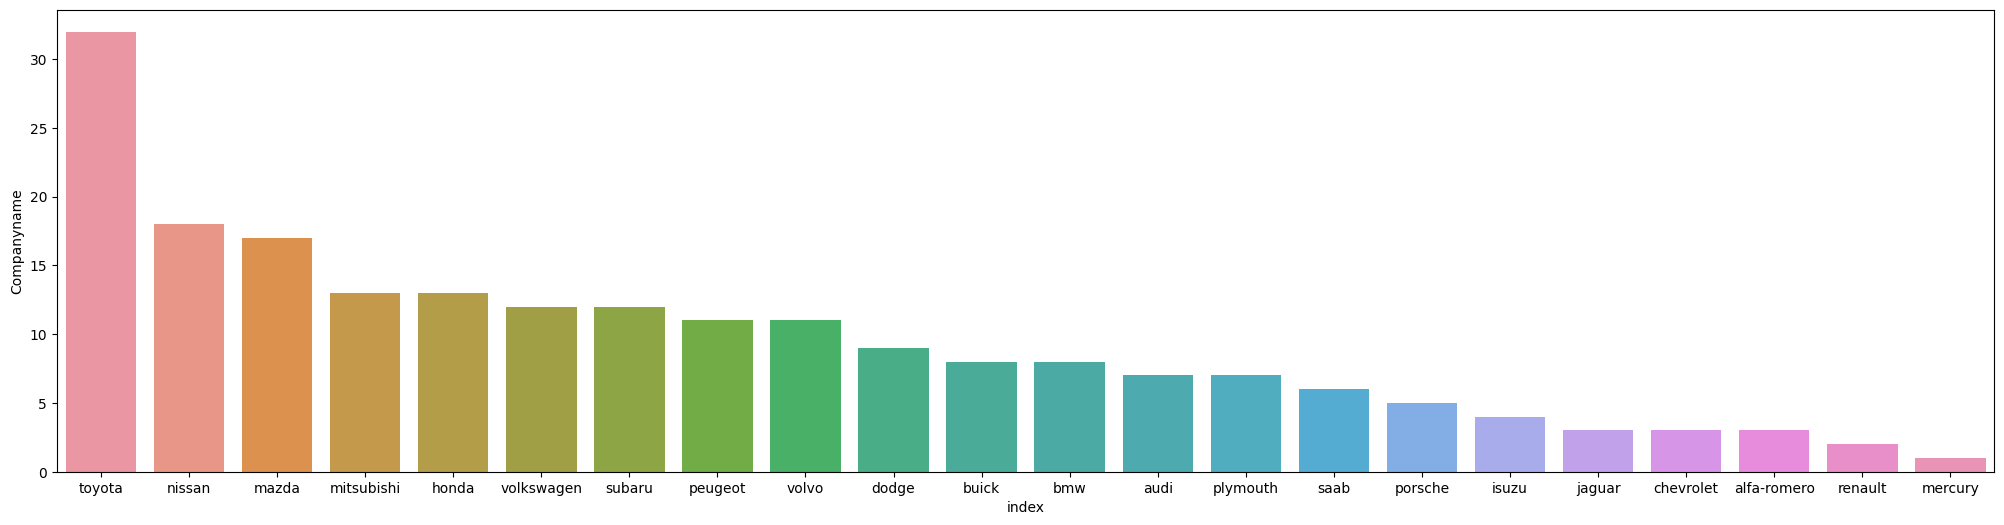

In [32]:
plt.figure(figsize=(25,6))
sns.barplot(cars,x='index',y='Companyname')

<Axes: xlabel='Companyname', ylabel='price'>

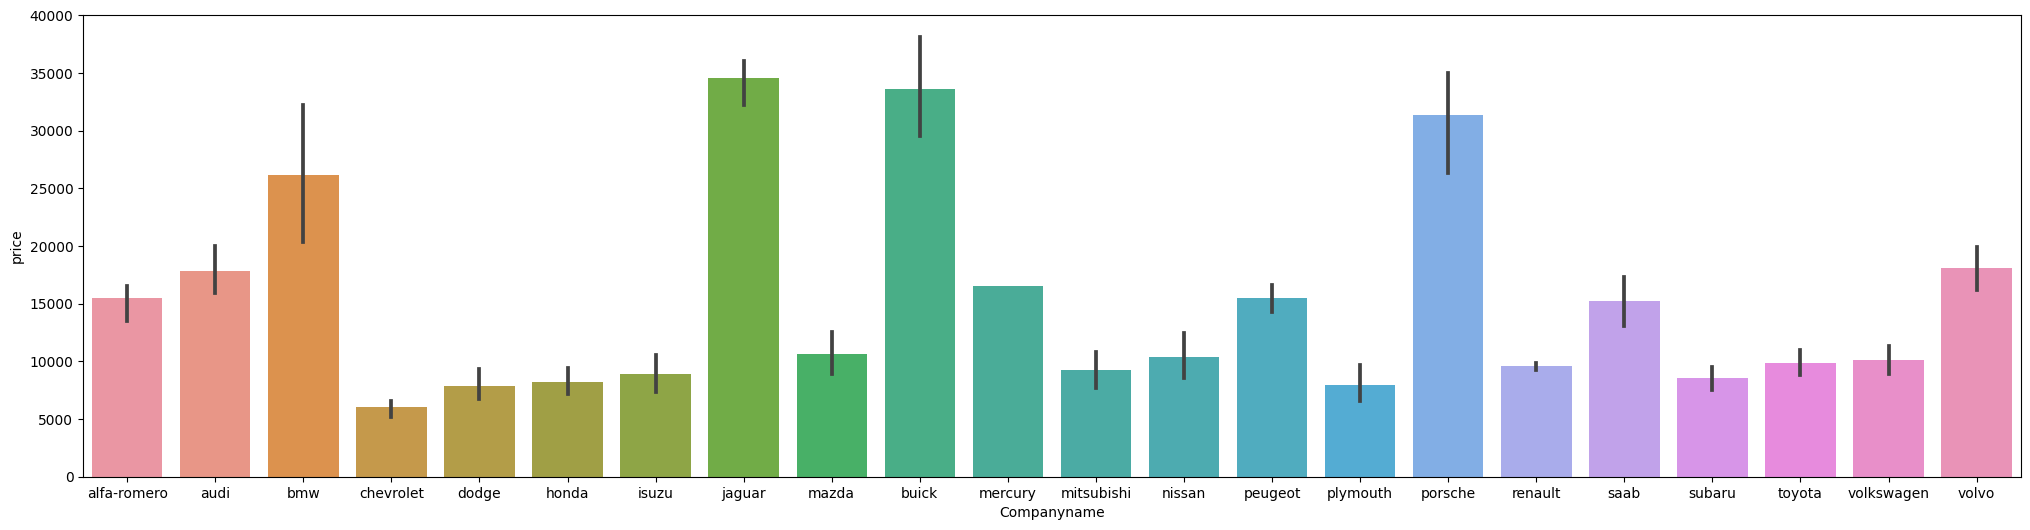

In [33]:
plt.figure(figsize=(25,6))
sns.barplot(df,x='Companyname',y='price')

<Axes: xlabel='fueltype', ylabel='price'>

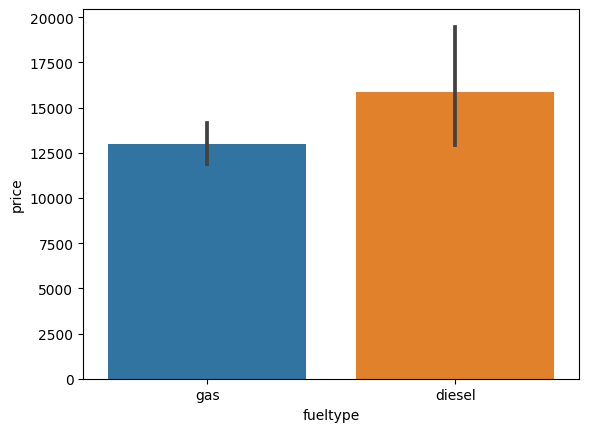

In [34]:
sns.barplot(df,x='fueltype',y='price')

<Axes: xlabel='carbody', ylabel='price'>

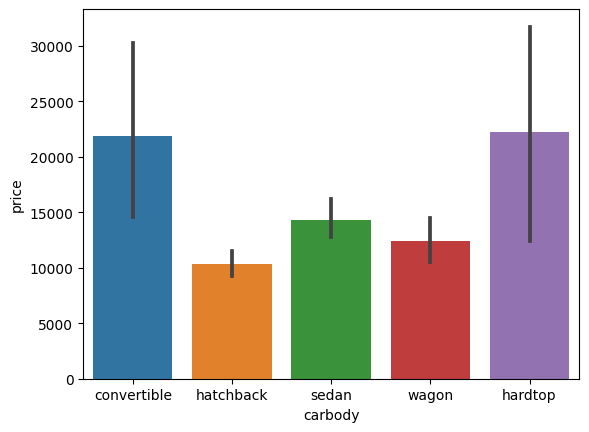

In [35]:
sns.barplot(df,x='carbody',y='price')

<Axes: xlabel='carbody'>

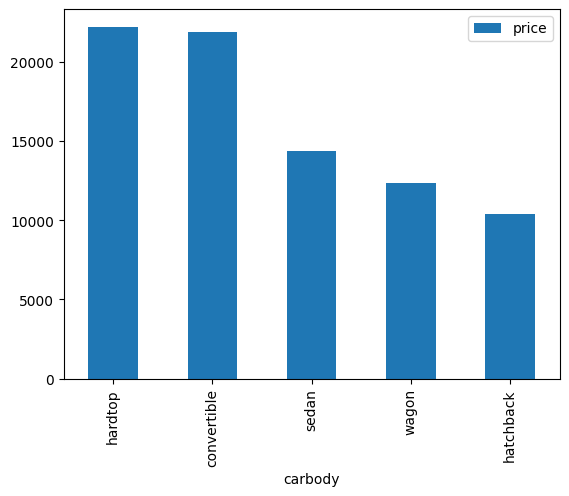

In [36]:
cars=pd.DataFrame(df.groupby('carbody')['price'].mean().sort_values(ascending=False))
cars.plot.bar()

Inference :

1.Jaguar and Buick seem to have highest average price.

2.diesel has higher average price than gas.

3.hardtop and convertible have higher average price.

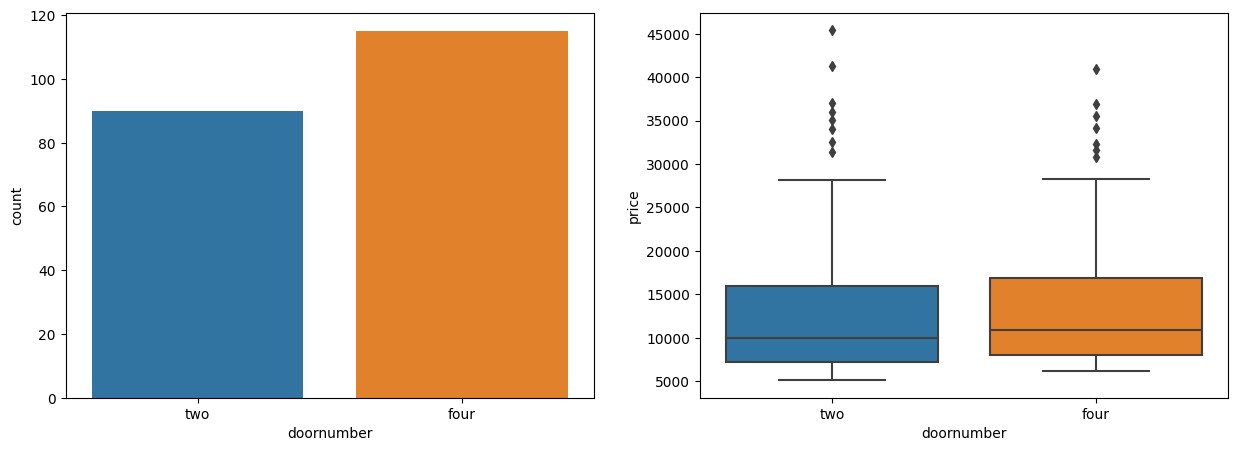

<Figure size 640x480 with 0 Axes>

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df,x=df['doornumber'])
plt.subplot(1,2,2)
sns.boxplot(df,x='doornumber',y='price')
plt.show()
plt.tight_layout()

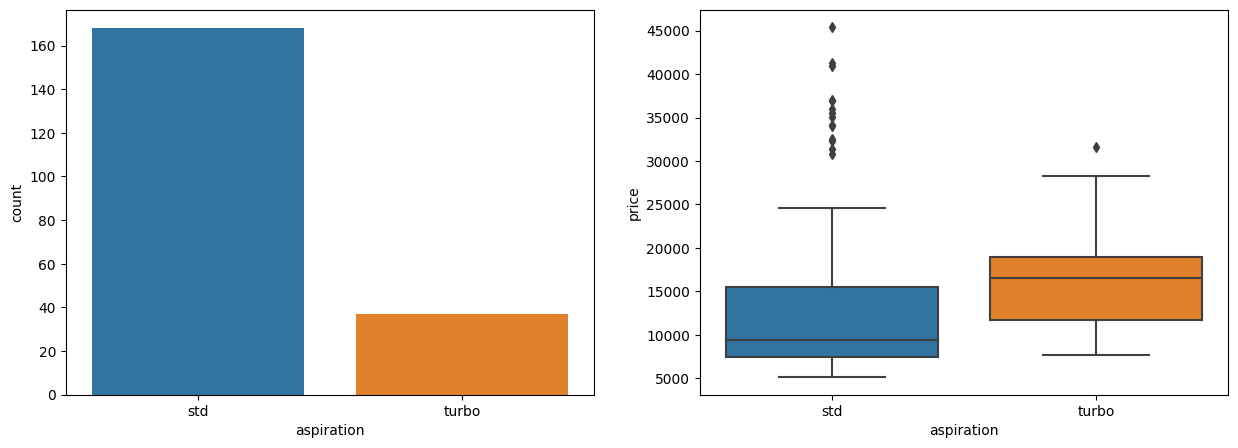

<Figure size 640x480 with 0 Axes>

In [38]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df,x=df['aspiration'])
plt.subplot(1,2,2)
sns.boxplot(df,x='aspiration',y='price')
plt.show()
plt.tight_layout()

# **Inference :**

1.doornumber variable is not affacting the price much. There is no sugnificant difference between the categories in it.

2.It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)

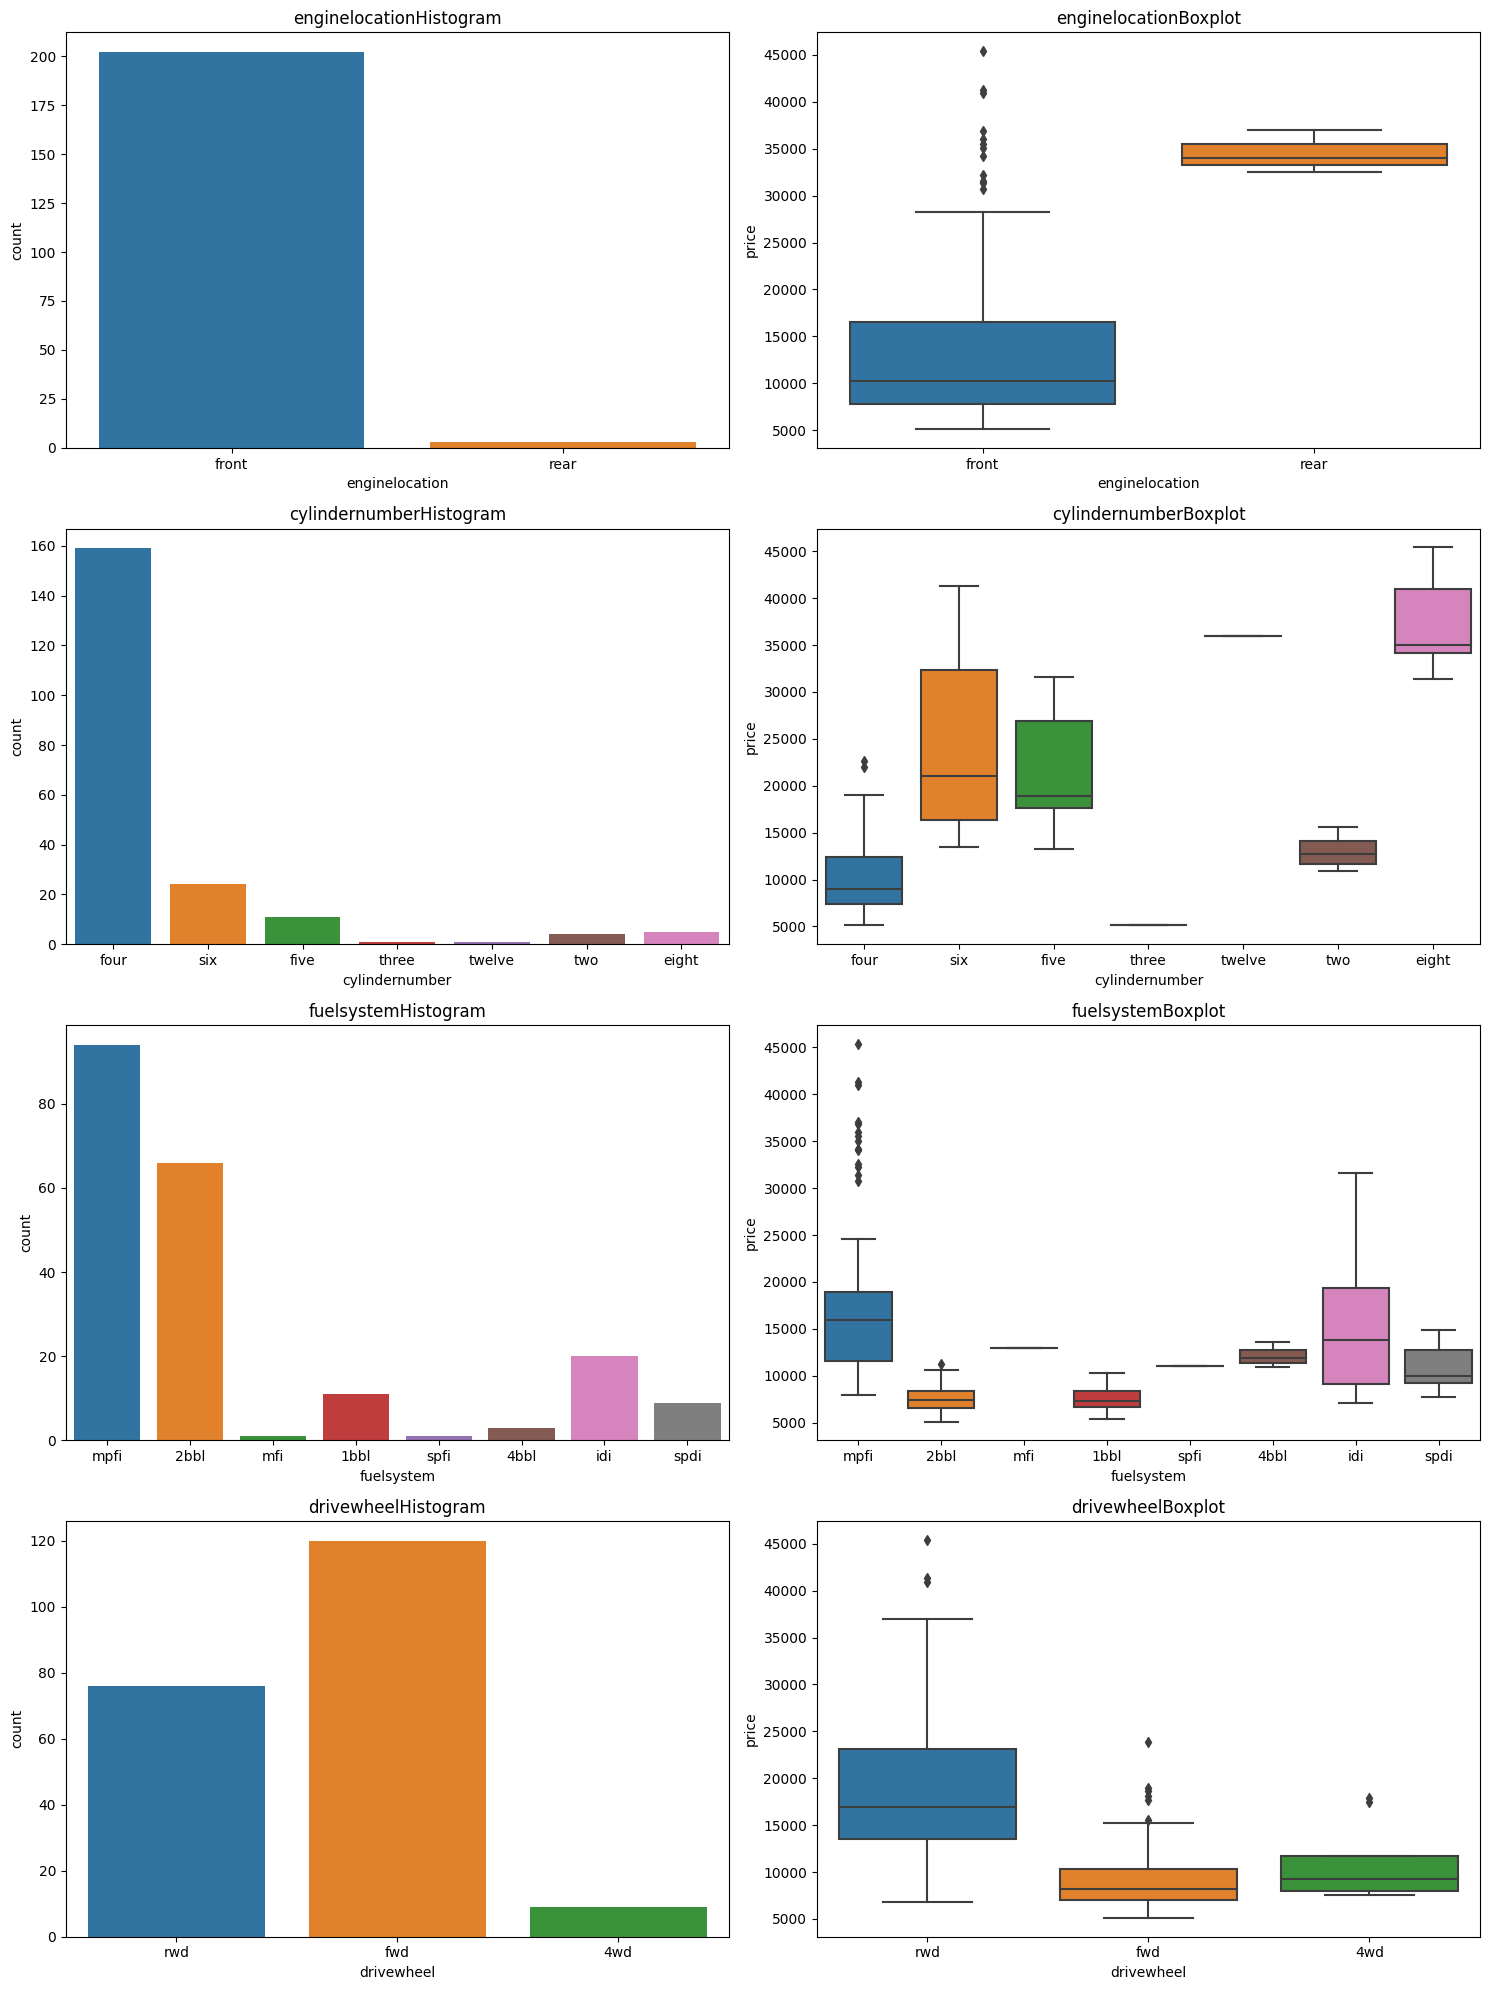

In [39]:
def plot_count(col,fig):
  plt.subplot(4,2,fig)
  plt.title(col+'Histogram')
  sns.countplot(df,x=col)
  plt.subplot(4,2,(fig+1))
  plt.title(col+'Boxplot')
  sns.boxplot(df,x=col,y='price')
plt.figure(figsize=(15,20))
plot_count('enginelocation', 1)
plot_count('cylindernumber', 3)
plot_count('fuelsystem', 5)
plot_count('drivewheel', 7)
plt.tight_layout()

# Inference :
1.Very few datapoints for enginelocation categories to make an inference.

2.Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.

3.mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference

4.A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

# Visualizing numerical data

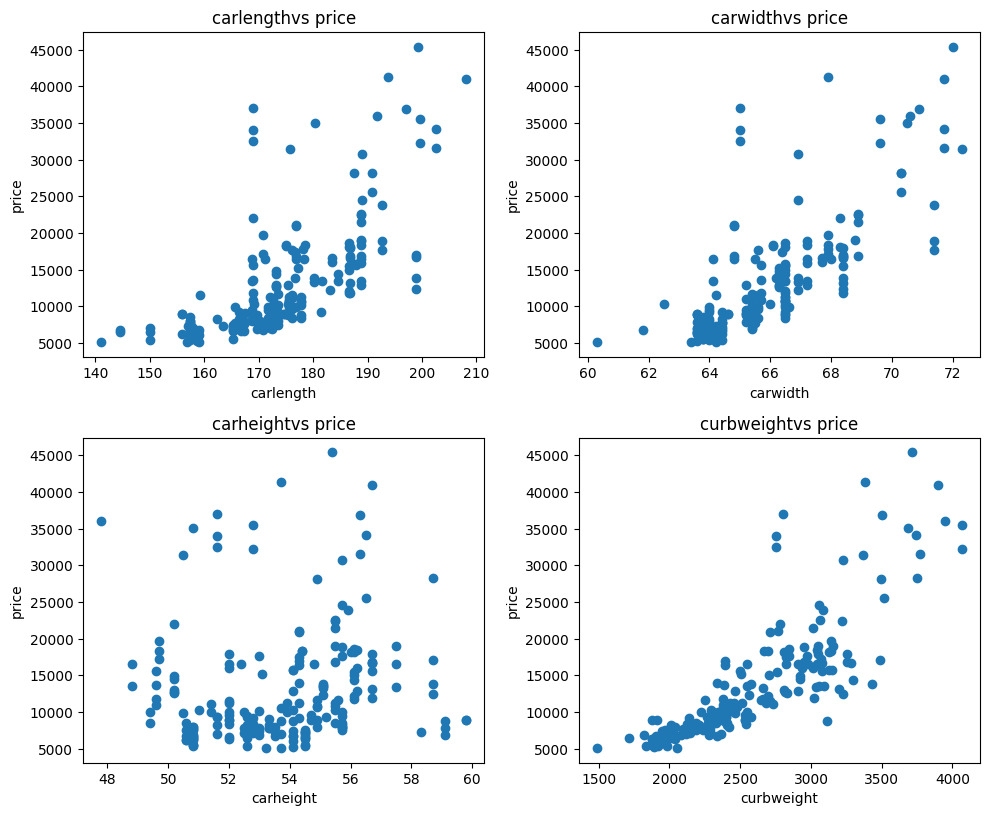

In [40]:
def scatter_plot(col,fig):
  plt.subplot(5,2,fig)
  plt.scatter(data=df,x=col,y='price')
  plt.title(col+ 'vs price')
  plt.xlabel(col)
  plt.ylabel('price')
plt.figure(figsize=(10,20))
scatter_plot('carlength',1)
scatter_plot('carwidth',2)
scatter_plot('carheight',3)
scatter_plot('curbweight',4)
plt.tight_layout()

Inference :

1.carwidth, carlength and curbweight seems to have a poitive correlation with price.

2.carheight doesn't show any significant trend with price.

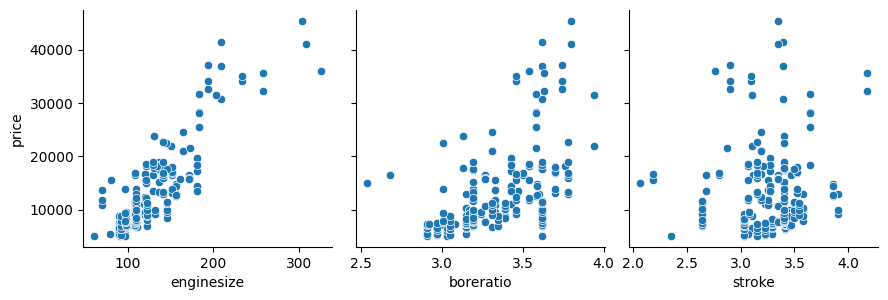

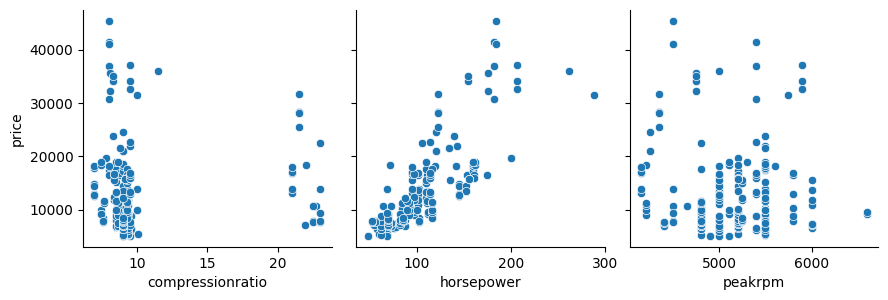

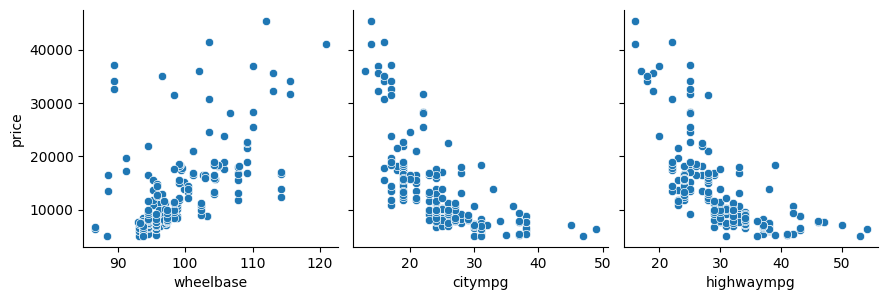

In [41]:
def pp(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',height=3, aspect=1, kind='scatter')
    plt.show()

pp('enginesize','boreratio','stroke')
pp('compressionratio','horsepower','peakrpm')
pp('wheelbase','citympg','highwaympg')

Inference :

1.enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.

2.citympg, highwaympg - seem to have a significant negative correlation with price.

In [42]:
df.corr()

<ipython-input-42-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


**Deriving new featurers**

In [43]:
#fuel economy
df['fueleconomy']=(0.55*df['citympg'])+(0.45*df['highwaympg'])

In [50]:
df['price'] = df['price'].astype('int')
temp = df.copy()
table = temp.groupby(['Companyname'])['price'].mean()
temp=temp.merge(table.reset_index(),how='left',on='Companyname')
bins = [0,10000,20000,40000]
df_bin=['Budget','Medium','Highend']
df['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=df_bin)
df.head()

,car_ID,symboling,CarName,Companyname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero giulia,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero stelvio,alfa-romero,gas,std,two,convertible,rwd,front,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero Quadrifoglio,alfa-romero,gas,std,two,hatchback,rwd,front,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi 100 ls,audi,gas,std,four,sedan,fwd,front,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi 100ls,audi,gas,std,four,sedan,4wd,front,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


<Axes: xlabel='fueleconomy', ylabel='price'>

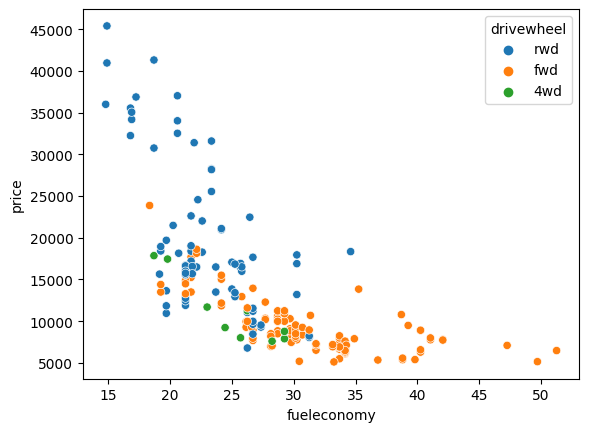

In [52]:
sns.scatterplot(data=df,x='fueleconomy',y='price',hue='drivewheel')

**Inference**
1.Fuel economy has an obvious negative correlation with price and is significant

<Axes: xlabel='fueleconomy', ylabel='price'>

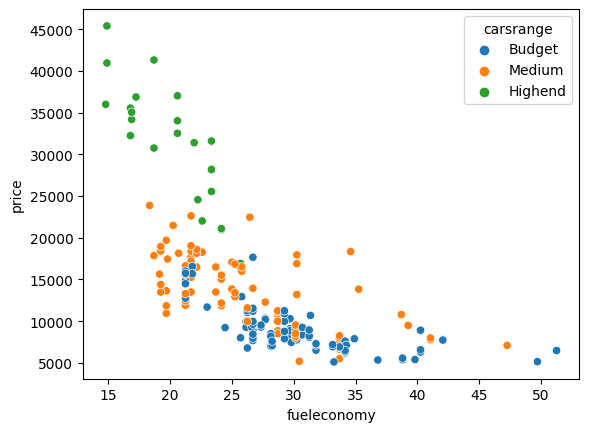

In [54]:
sns.scatterplot(data=df,x='fueleconomy',y='price',hue='carsrange')

<Axes: xlabel='fuelsystem', ylabel='price'>

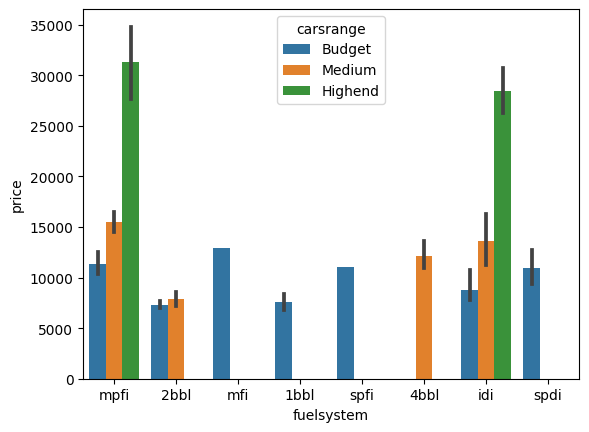

In [55]:
sns.barplot(data=df,x='fuelsystem',y='price',hue='carsrange',)

<Axes: xlabel='fuelsystem,drivewheel'>

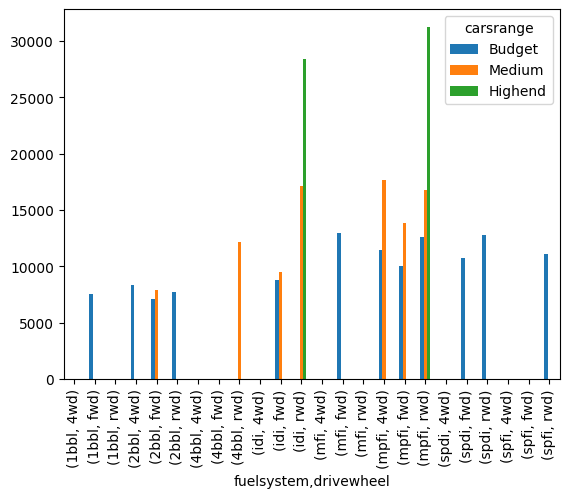

In [60]:
cars=pd.DataFrame(df.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
cars.plot.bar()

**Inference :**

High ranged cars prefer rwd drivewheel with idi or mpfi fuelsystem.

**List of significant variables after Visual analysis :**
- Car Range
- Engine Type
- Fuel type
- Car Body
- Aspiration
- Cylinder Number
- Drivewheel
- Curbweight
- Car Length
- Car width
- Engine Size
- Boreratio
- Horse Power
- Wheel base
- Fuel Economy